In [3]:
import pandas as pd

In [ ]:
pd.read_json('lub_pop_h3.json')

In [1]:
import duckdb
import pandas as pd

%load_ext sql
conn = duckdb.connect()
%sql conn --alias duckdb

In [2]:
import duckdb
import pandas as pd
# No need to import duckdb_engine
#  jupysql will auto-detect the driver needed based on the connection string!

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [4]:
%sql duckdb:///:memory:

In [5]:
%sql SELECT 'Off and flying!' AS a_duckdb_column;

,a_duckdb_column
0,Off and flying!


In [6]:
%%sql
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 5;

,schema_name,function_name
0,pg_catalog,shobj_description
1,pg_catalog,shobj_description
2,pg_catalog,shobj_description
3,pg_catalog,pg_typeof
4,pg_catalog,pg_typeof


In [7]:
%sql res << SELECT 'Off and flying!' AS a_duckdb_column;

In [8]:
%%sql
INSTALL httpfs;
LOAD httpfs;

,Success


In [ ]:
%sqlplot boxplot --table "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet" --column trip_distanceo
# https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet

In [14]:
%%sql --save short_trips --no-execute
SELECT *
FROM 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet'
WHERE trip_distance < 6.3

Skipping execution...

## FSQ Places Data

In [ ]:
%%sql
CREATE TABLE places AS  
    SELECT _ FROM read_parquet('/home/pi/dev/notebooks/30DayMap2024/data/places-_.zstd.parquet');


In [5]:
%%sql --save places 
SELECT *
FROM '/home/pi/dev/notebooks/30DayMap2024/data/places-00000.zstd.parquet'

,fsq_place_id,name,latitude,longitude,address,locality,region,postcode,admin_region,post_town,...,website,email,facebook_id,instagram,twitter,fsq_category_ids,fsq_category_labels,placemaker_url,geom,bbox
0,1d85c553bf954513ff7ca8e8,Jellybugs,NaN,NaN,"The Rotunda, Clarence St Unit 3",Kingston upon Thames,Greater London,KT1 1QJ,England,Kingston Upon Thames,...,http://www.jellybugs.co.uk,None,1.549471e+14,None,None,"[4bf58dd8d48988d182941735, 4d4b7105d754a06374d...","[Arts and Entertainment > Amusement Park, Dini...",https://foursquare.com/placemakers/review-plac...,NaN,"{'xmin': None, 'ymin': None, 'xmax': None, 'ym..."
1,4cceed8fdd919eb0879a139e,Voting at 1665 Gravenstein Hwy N,38.420033,-122.844963,1665 Gravenstein Hwy N,Sebastopol,CA,95472,None,None,...,None,None,NaN,None,None,[4cae28ecbf23941eb1190695],[Community and Government > Polling Place],https://foursquare.com/placemakers/review-plac...,"[0, 0, 0, 0, 1, 192, 94, 182, 19, 223, 176, 21...","{'xmin': -122.844963, 'ymin': 38.420033, 'xmax..."
2,8b15eec9b3934a208461f3e8,ДВЕРИ-ЗАМКИ,NaN,NaN,"Братиславская Ул., д. 22",Москва,Москва,109341,None,None,...,None,None,NaN,None,None,NaN,NaN,https://foursquare.com/placemakers/review-plac...,NaN,"{'xmin': None, 'ymin': None, 'xmax': None, 'ym..."
3,59a6a0c63b4e007881f89ced,Dellamonica Mármores,NaN,NaN,None,São José dos Campos,São Paulo,12229,None,None,...,None,None,NaN,None,None,NaN,NaN,https://foursquare.com/placemakers/review-plac...,NaN,"{'xmin': None, 'ymin': None, 'xmax': None, 'ym..."
4,96f8358fcf354b47d493eb0b,Sidhu & Sons Nursery,NaN,NaN,2424 Miners Bluff Rd,Kamloops,BC,None,None,None,...,None,None,NaN,None,None,"[4bf58dd8d48988d14b941735, 4eb1c0253b7b52c0e1a...","[Dining and Drinking > Winery, Retail > Garden...",https://foursquare.com/placemakers/review-plac...,NaN,"{'xmin': None, 'ymin': None, 'xmax': None, 'ym..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045884,5907dabebb8d3676f0d7d201,Johnny’s Pizzeria,-27.457979,153.035101,694 Ann St,Fortitude Valley,QLD,4006,None,None,...,None,None,NaN,johnnyspizzeria_,None,[4bf58dd8d48988d1ca941735],[Dining and Drinking > Restaurant > Pizzeria],https://foursquare.com/placemakers/review-plac...,"[0, 0, 0, 0, 1, 64, 99, 33, 31, 139, 103, 119,...","{'xmin': 153.03510065277578, 'ymin': -27.45797..."
1045885,530683bd498ed4396346c3ad,Tabby Magic,21.293124,-157.837153,1670 Makaloa St,Honolulu,HI,96814,None,None,...,http://www.hashtagtabbymagic.wordpress.com,None,NaN,None,None,[4bf58dd8d48988d110951735],[Business and Professional Services > Health a...,https://foursquare.com/placemakers/review-plac...,"[0, 0, 0, 0, 1, 192, 99, 186, 201, 244, 233, 2...","{'xmin': -157.8371529166264, 'ymin': 21.293123..."
1045886,2094e3cc8cba496854d22a1c,Gary Roberts,-30.361936,153.100657,2 Fifteenth Ave,Sawtell,NSW,2452,None,None,...,None,None,NaN,None,None,"[63be6904847c3692a84b9b4d, 63be6904847c3692a84...",[Business and Professional Services > Home Imp...,https://foursquare.com/placemakers/review-plac...,"[0, 0, 0, 0, 1, 64, 99, 35, 56, 149, 130, 210,...","{'xmin': 153.10065722991288, 'ymin': -30.36193..."
1045887,4ecd5ef2775bbb5f2f6cf907,King St,-37.785928,175.270769,None,Hamilton,Waikato,None,None,None,...,None,None,NaN,None,None,[4bf58dd8d48988d124941735],[Business and Professional Services > Office],https://foursquare.com/placemakers/review-plac...,"[0, 0, 0, 0, 1, 64, 101, 232, 170, 36, 117, 15...","{'xmin': 175.27076933730527, 'ymin': -37.78592..."


<Axes: title={'center': "Boxplot from 'places'"}>

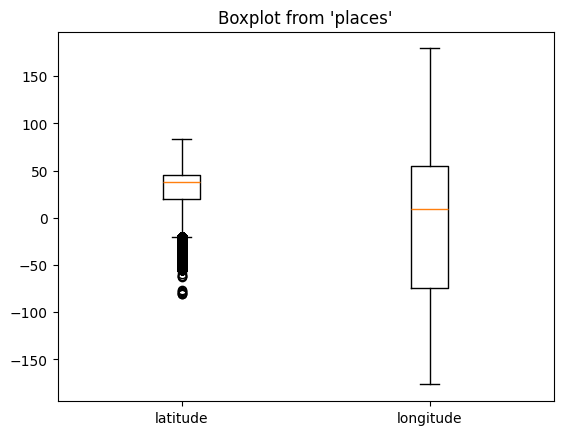

In [12]:
%sqlplot boxplot --table places --column latitude longitude

In [15]:
%%sql
places

RuntimeError: If using snippets, you may pass the --with argument explicitly.
For more details please refer: https://jupysql.ploomber.io/en/latest/compose.html#with-argument


Original error message from DB driver:
Parser Error: syntax error at or near "places"

If you need help solving this issue, send us a message: https://ploomber.io/community
